In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore');

In [3]:
df = pd.read_csv('data1.csv', header=None) #Not consider first row as header
columns = {
        i: f'Feature {i+1}'
        for i in range(len(df.columns))
    }

# Let's have a look on our dataset!

In [4]:
df.rename(columns=columns, inplace=True)
print(f'The dataset have:\nRows: {df.shape[0]}\nColumns: {df.shape[1]}')
display(df.head())


The dataset have:
Rows: 1000
Columns: 60


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Feature 60
0,109,0,1,7,9,0,5,8,6,0,...,3,0,11,0,0,0,0,1,18,1
1,309,21,4,1,19,1,4,35,23,0,...,10,0,13,0,14,9,1,1,14,1
2,149,6,1,8,14,0,5,15,11,0,...,2,0,8,0,3,2,1,1,18,1
3,305,18,5,7,26,0,10,37,21,1,...,8,3,13,1,7,1,1,1,20,1
4,491,23,8,33,47,0,12,61,36,0,...,16,2,34,1,5,6,1,1,24,1


# Now lets have a look on the statistics of the dataset

In [5]:
display(df.describe())

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Feature 60
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,697.120000,39.005000,13.934000,20.626000,66.452000,1.054000,11.477000,75.151000,47.432000,2.152000,...,19.187000,5.419000,29.942000,4.389000,17.124000,11.899000,0.927000,0.995000,19.142000,0.635000
std,523.340997,32.134835,13.617528,22.765773,52.045407,1.663084,12.690174,55.927293,38.373218,2.858158,...,16.756754,5.811989,25.226752,5.126008,17.811285,12.356354,0.260267,0.070569,6.632483,0.481671
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,272.000000,13.000000,4.000000,7.000000,24.750000,0.000000,3.000000,31.750000,19.000000,0.000000,...,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000,15.000000,0.000000
50%,626.000000,33.000000,10.000000,14.000000,58.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000,18.000000,1.000000
75%,953.250000,56.000000,20.250000,26.250000,93.000000,1.000000,15.000000,103.000000,65.000000,3.000000,...,29.000000,8.000000,44.000000,7.000000,25.000000,18.000000,1.000000,1.000000,22.000000,1.000000
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,127.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000,73.000000,1.000000


# Null check

In [6]:
display(df.isnull().any())

Feature 1     False
Feature 2     False
Feature 3     False
Feature 4     False
Feature 5     False
Feature 6     False
Feature 7     False
Feature 8     False
Feature 9     False
Feature 10    False
Feature 11    False
Feature 12    False
Feature 13    False
Feature 14    False
Feature 15    False
Feature 16    False
Feature 17    False
Feature 18    False
Feature 19    False
Feature 20    False
Feature 21    False
Feature 22    False
Feature 23    False
Feature 24    False
Feature 25    False
Feature 26    False
Feature 27    False
Feature 28    False
Feature 29    False
Feature 30    False
Feature 31    False
Feature 32    False
Feature 33    False
Feature 34    False
Feature 35    False
Feature 36    False
Feature 37    False
Feature 38    False
Feature 39    False
Feature 40    False
Feature 41    False
Feature 42    False
Feature 43    False
Feature 44    False
Feature 45    False
Feature 46    False
Feature 47    False
Feature 48    False
Feature 49    False
Feature 50    False


In [7]:
def get_X_y():
    X = df.iloc[:,:-1] # All columns except the last one
    y = df.iloc[:,-1] # The last column
    return X, y
X, y = get_X_y()

# Let's talk about distributions

In [8]:
def data_exploration(col):
    values = col.value_counts() 
    total = np.array([values[0], values[1]]).sum()
    eps = 0
    for i, value in enumerate(values):
        percentage = int((value/total)*100)
        print(f'catigory {1-i} has {value} samples, percentage {percentage + eps}%')
        eps+=1

    values.plot(kind='pie');

In [9]:
print(X.shape)
X.head()

(1000, 59)


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 50,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59
0,109,0,1,7,9,0,5,8,6,0,...,0,3,0,11,0,0,0,0,1,18
1,309,21,4,1,19,1,4,35,23,0,...,0,10,0,13,0,14,9,1,1,14
2,149,6,1,8,14,0,5,15,11,0,...,0,2,0,8,0,3,2,1,1,18
3,305,18,5,7,26,0,10,37,21,1,...,0,8,3,13,1,7,1,1,1,20
4,491,23,8,33,47,0,12,61,36,0,...,0,16,2,34,1,5,6,1,1,24


(1000,)




0    1
1    1
2    1
3    1
4    1
Name: Feature 60, dtype: int64



catigory 1 has 635 samples, percentage 63%
catigory 0 has 365 samples, percentage 37%


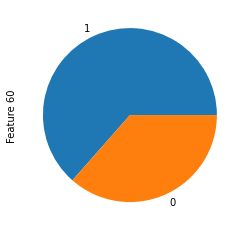

In [10]:
print(y.shape)
print('\n')
display(y.head())
print('\n')
data_exploration(y) #Unbalnced data 

In [11]:
def normalize(x):
    return x - x.mean()

In [12]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report

def evualate__confusion_matrix(classifier, X_test, ground_trouth, title=None, fontsize=20):
    # Predetiction
    predetiction = classifier.predict(X_test)
    acc = accuracy_score(ground_trouth, predetiction)
    print(classification_report(ground_trouth, predetiction))
    print("Accuracy:", acc)
    print('\n')

    # Confusion matrix
    plot_confusion_matrix(classifier, 
                          X_test, 
                          ground_trouth,
                          cmap=plt.cm.Blues)
    plt.title(f'confusion matrix\n{title}', fontsize=fontsize)
    plt.show()

    #ROC and AuC
    y_pred_proba = classifier.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(ground_trouth,  y_pred_proba)
    auc = roc_auc_score(ground_trouth, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title('ROC', fontsize=fontsize)
    plt.show()


    plt.show()
    print('-'*100)
    print('\n'*3)

    return acc


# Logistic regression
## Logistic Regression Assumptions
* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the 
* model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.
 
## Sources:
* [building-a-logistic-regression-in-python-step-by-step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)
* [understanding-logistic-regression-python](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)


In [13]:
def series2df(s):
    return s.to_frame()# (n,) -> (n, 1)

def split(X, y, test_size=0.1, shuffle=True,random_state=5):
    X = normalize(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    shuffle=shuffle,
                                                    random_state=random_state)
    y_train = series2df(y_train) 
    y_test = series2df(y_test)   
    return X_train, X_test, y_train, y_test

logisticRegr  = LogisticRegression(max_iter=20000) #init LogisticRegression model


# Split the data into 90:10 of train:test and Construct a logistic regression model on the train data.

In [14]:
X_train, X_test, y_train, y_test = split(X, y)
classifier = logisticRegr.fit(X_train, y_train);

# Train dataset catigory distribution

catigory 1 has 576 samples, percentage 64%
catigory 0 has 324 samples, percentage 37%


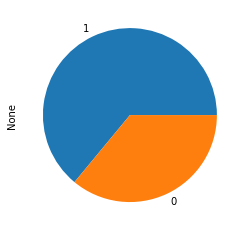

In [15]:
data_exploration(pd.Series(y_train.values.flatten()))

# Test dataset catigory distribution

catigory 1 has 59 samples, percentage 59%
catigory 0 has 41 samples, percentage 42%


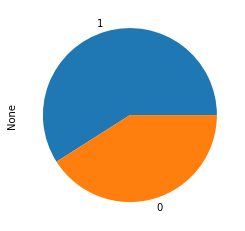

In [16]:
data_exploration(pd.Series(y_test.values.flatten()))

# Explore the Logistic Regression model

In [17]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
def find_model_weights(classifier):
    # get importance
    if len(classifier.coef_) == 1:
        weights = classifier.coef_[0]
    else:
        weights = classifier.coef_ #Lasso has different shape

    # summarize feature importance
    max_value = -np.inf
    save_value = []
    for i, v in enumerate(weights):
        print(f'Feature {i}, weight: {v}')
    i = np.argmax(np.abs(weights))
    print(f'\nlargest absolute weight coefficient {i+1}: weight: {np.abs(weights[i])}')
    print(f'intercept: {classifier.intercept_[0]}\n')


# Extract the weights of the models and find the column with largest absolute weight

In [18]:
find_model_weights(classifier)

Feature 0, weight: 0.031512914534580785
Feature 1, weight: -0.0046614666851260145
Feature 2, weight: -0.015781425030725174
Feature 3, weight: -0.006045191834372824
Feature 4, weight: -0.066216133019677
Feature 5, weight: -0.192290182032823
Feature 6, weight: -0.04040276342520654
Feature 7, weight: -0.04556168295116484
Feature 8, weight: -0.048330717725694056
Feature 9, weight: 0.04506657830520682
Feature 10, weight: 0.06936239347982555
Feature 11, weight: -0.8736673942972192
Feature 12, weight: -0.052140961839788384
Feature 13, weight: -0.022122524929928333
Feature 14, weight: 0.07546352064232142
Feature 15, weight: 0.0
Feature 16, weight: -0.050509389777866925
Feature 17, weight: -0.14050443947235725
Feature 18, weight: -0.05788428580555669
Feature 19, weight: -0.049959147750386526
Feature 20, weight: -0.006514300469618573
Feature 21, weight: -0.07080204954312767
Feature 22, weight: -0.014266712433090216
Feature 23, weight: -0.11031560935092596
Feature 24, weight: 0.0483757699128098
F

catigory 1 has 59 samples, percentage 59%
catigory 0 has 41 samples, percentage 42%


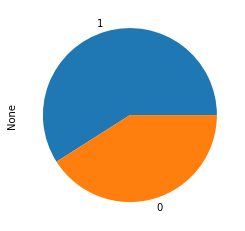

In [19]:
data_exploration(pd.Series(y_test.values.flatten()))

# Use the constructed model to predict the label of the test data compute the confusion matrix and store it.

              precision    recall  f1-score   support

           0       0.77      0.56      0.65        41
           1       0.74      0.88      0.81        59

    accuracy                           0.75       100
   macro avg       0.75      0.72      0.73       100
weighted avg       0.75      0.75      0.74       100

Accuracy: 0.75




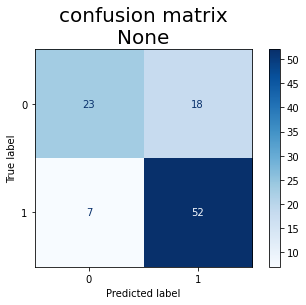

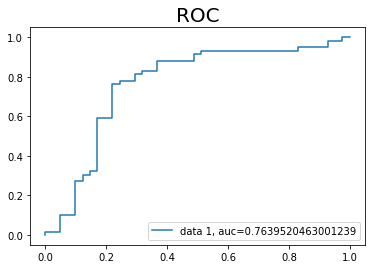

----------------------------------------------------------------------------------------------------






In [20]:
_ = evualate__confusion_matrix(classifier, X_test, y_test)

# Repeat the previous step with KNN using K=5 neighbors and majority function. Use the same split from previous step.

# k-nearest neighbors (KNN)
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) .


![](https://miro.medium.com/max/767/1*AuXDgGrr0wbCoF6KDXXSZQ.jpeg)

## Sources:
* [machine-learning-basics-with-the-k-nearest-neighbors-algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
* [k-nearest-neighbor-classification-scikit-learn](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)

# Split the data into 90:10 of train:test and Construct a KNN model on the train data.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

X, y = get_X_y()
knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = split(X, y) #Same split
classifier = knn.fit(X_train, y_train)

# Extract the weights of the models and find the column with largest absolute weight
## 'KNeighborsClassifier' object has no attribute 'coef_'

There’s no need to build a model, tune several parameters, or make additional assumptions.

In [22]:
# find_model_weights(classifier)

# Use the constructed model to predict the label of the test data Compute the confusion matrix and store it.

              precision    recall  f1-score   support

           0       0.67      0.54      0.59        41
           1       0.72      0.81      0.76        59

    accuracy                           0.70       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.70      0.70      0.69       100

Accuracy: 0.7




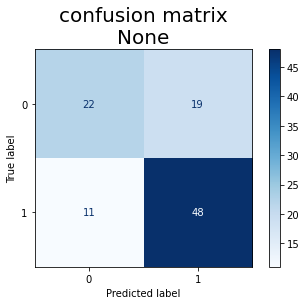

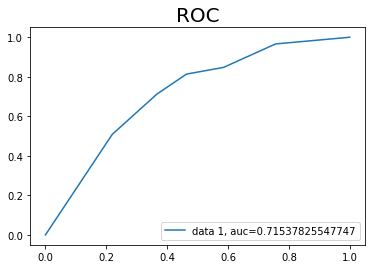

----------------------------------------------------------------------------------------------------






In [23]:
_ = evualate__confusion_matrix(classifier, X_test, y_test)

# 5-fold cross validation
The classic method (split for training and test) is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. 

![Image of Yaktocat](https://miro.medium.com/max/1500/1*IjKy-Zc9zVOHFzMw2GXaQw.png)

# Sources:
* [k-fold-cross-validation](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833)

In [24]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate, cross_val_score
def kfold_cross_validition(kfold):
    scores = []
    X, y = get_X_y()


    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

        classifier = logisticRegr.fit(X_train, y_train);
        find_model_weights(classifier)
        index = i+1
        auc = evualate__confusion_matrix(classifier, X_test, 
                                        y_test, title=f'evaluate on fold {index}/5')
        scores.append(auc)
    print('\n')
    best_score = np.argmax(scores)

    for i, score in enumerate(scores):
        if i == best_score:
            print('best score', end='-> ')
        print(f'fold {i+1} score {score}')


Feature 0, weight: 0.034188032869269594
Feature 1, weight: 0.013453603768360738
Feature 2, weight: -0.0279773166554969
Feature 3, weight: -0.019369459154768842
Feature 4, weight: -0.05827036743360034
Feature 5, weight: -0.08579485352736081
Feature 6, weight: -0.05172195618261971
Feature 7, weight: -0.044919854794713054
Feature 8, weight: -0.06685309077550562
Feature 9, weight: 0.022368935208982657
Feature 10, weight: -0.06994995367681837
Feature 11, weight: -0.5000021818899659
Feature 12, weight: -0.04599612208482012
Feature 13, weight: -0.02890902404035201
Feature 14, weight: 0.01283820166908744
Feature 15, weight: 0.0
Feature 16, weight: -0.04529467267766475
Feature 17, weight: -0.03313670157830848
Feature 18, weight: -0.05441497694884003
Feature 19, weight: -0.03763845803575947
Feature 20, weight: 0.026998666751451933
Feature 21, weight: -0.08595388217546246
Feature 22, weight: -0.060514025604457754
Feature 23, weight: 0.12050502162537455
Feature 24, weight: 0.005991206082675608
Fea

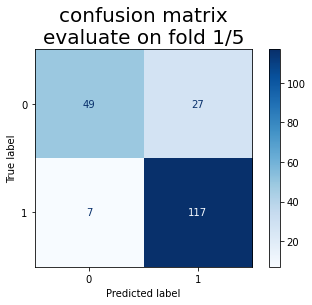

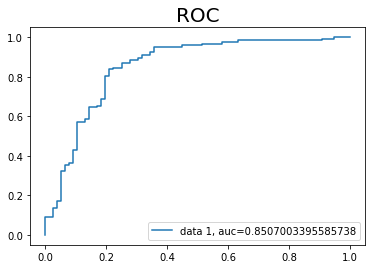

----------------------------------------------------------------------------------------------------




Feature 0, weight: 0.04526662371752819
Feature 1, weight: 0.011220831761141864
Feature 2, weight: -0.035224849224772675
Feature 3, weight: -0.009362929151913855
Feature 4, weight: -0.07268486642148808
Feature 5, weight: -0.041592652270358584
Feature 6, weight: -0.04633368469429324
Feature 7, weight: -0.05506070746663612
Feature 8, weight: -0.069273260961598
Feature 9, weight: 0.08662052891700747
Feature 10, weight: 0.15534995848915345
Feature 11, weight: -1.0143623674411395
Feature 12, weight: -0.0902879059636523
Feature 13, weight: -0.03902178858614826
Feature 14, weight: 0.06918755439684397
Feature 15, weight: 0.0
Feature 16, weight: -0.06372652922901963
Feature 17, weight: 0.1455099530690295
Feature 18, weight: -0.02090562746587918
Feature 19, weight: -0.06338751461972074
Feature 20, weight: -0.07108845931955694
Feature 21, weight: -0.0891798267941376
Feature 22, weight: -0.17366

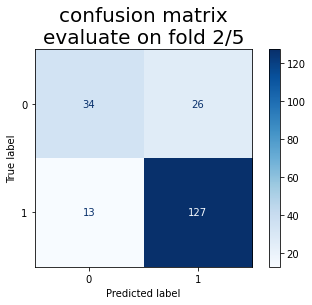

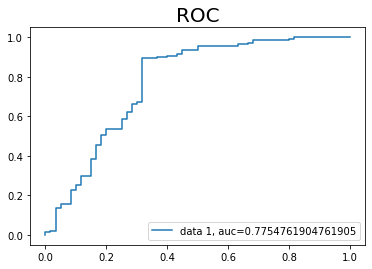

----------------------------------------------------------------------------------------------------




Feature 0, weight: 0.03843937836160978
Feature 1, weight: -5.7305431168670396e-05
Feature 2, weight: 0.022421331111122163
Feature 3, weight: 0.0022389480440802604
Feature 4, weight: -0.06750667459093534
Feature 5, weight: -0.12341900736929119
Feature 6, weight: -0.04675982339219564
Feature 7, weight: -0.060513037441946325
Feature 8, weight: -0.043918518638415054
Feature 9, weight: 0.09560850842776163
Feature 10, weight: 0.0034502838682747834
Feature 11, weight: -0.783726396759797
Feature 12, weight: -0.10705445141381095
Feature 13, weight: -0.030191325017296242
Feature 14, weight: 0.053341168718288395
Feature 15, weight: 0.0
Feature 16, weight: -0.051841692076198626
Feature 17, weight: -0.10640749286394233
Feature 18, weight: -0.06820010885041473
Feature 19, weight: -0.054696734294671874
Feature 20, weight: -0.06277573509340777
Feature 21, weight: -0.05618323350076059
Feature 22, we

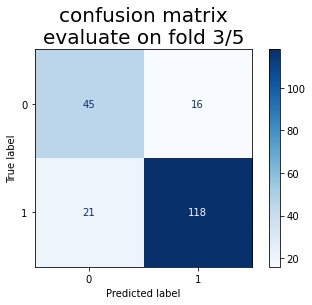

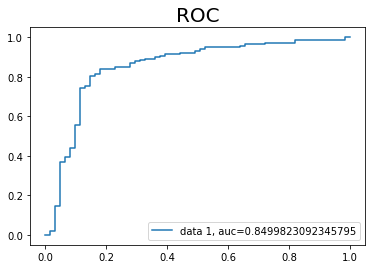

----------------------------------------------------------------------------------------------------




Feature 0, weight: 0.03432611691668568
Feature 1, weight: -0.012605607951446433
Feature 2, weight: -0.016848433886656848
Feature 3, weight: -0.011443361509012262
Feature 4, weight: -0.060774088928897546
Feature 5, weight: -0.159695758187149
Feature 6, weight: -0.04472030804085079
Feature 7, weight: -0.0317574429658576
Feature 8, weight: -0.058770690519749605
Feature 9, weight: 0.08962706488541669
Feature 10, weight: 0.09713327859289148
Feature 11, weight: -0.7355620221085999
Feature 12, weight: -0.0661171137891313
Feature 13, weight: -0.022313392272443014
Feature 14, weight: -0.005713999247721497
Feature 15, weight: 0.0
Feature 16, weight: -0.060798945321334015
Feature 17, weight: -0.14107206917179363
Feature 18, weight: -0.05090421087824238
Feature 19, weight: -0.06030660890121234
Feature 20, weight: -0.04786344405240868
Feature 21, weight: -0.05641611339865366
Feature 22, weight: 

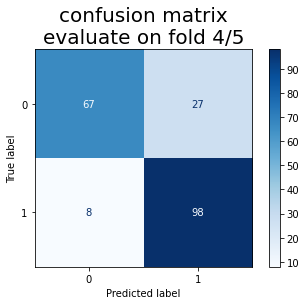

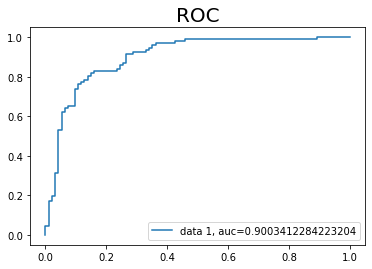

----------------------------------------------------------------------------------------------------




Feature 0, weight: 0.044476788077643145
Feature 1, weight: -0.023691239894098114
Feature 2, weight: -0.005098710066915727
Feature 3, weight: -0.032456747471994375
Feature 4, weight: -0.05376404406102774
Feature 5, weight: -0.27453378687072216
Feature 6, weight: -0.05203284942142816
Feature 7, weight: -0.03945337727843753
Feature 8, weight: -0.0686596015308089
Feature 9, weight: 0.07382047854791822
Feature 10, weight: 0.006758923543566342
Feature 11, weight: -0.7115618185520062
Feature 12, weight: -0.10783890149452394
Feature 13, weight: -0.044555402989069605
Feature 14, weight: 0.04749889821768414
Feature 15, weight: 0.0
Feature 16, weight: -0.050461618359250955
Feature 17, weight: -0.09675129878091572
Feature 18, weight: -0.002789418107580357
Feature 19, weight: -0.059896321832105824
Feature 20, weight: -0.01302455215122864
Feature 21, weight: -0.07623484264188457
Feature 22, weigh

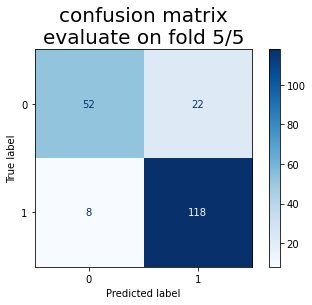

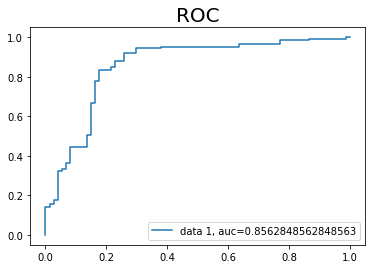

----------------------------------------------------------------------------------------------------






fold 1 score 0.83
fold 2 score 0.805
fold 3 score 0.815
fold 4 score 0.825
best score-> fold 5 score 0.85


In [25]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
kfold_cross_validition(kfold)


# Stratified KFold cross validation 

## Our data is unbalanced, so to ensure the classification results are as realistic as possible I chose to add Stratified KFold cross validation. 

The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.


![](https://i.stack.imgur.com/B9CCp.png)

Feature 0, weight: 0.03520157051898389
Feature 1, weight: 0.006010978176080175
Feature 2, weight: -0.020071964321535313
Feature 3, weight: -0.021858320832505076
Feature 4, weight: -0.06148400678108143
Feature 5, weight: -0.040239995201877085
Feature 6, weight: -0.05115453578328521
Feature 7, weight: -0.038564815600077455
Feature 8, weight: -0.053133791651281854
Feature 9, weight: 0.02247248902426189
Feature 10, weight: 0.10203342829785923
Feature 11, weight: -0.8159544682848061
Feature 12, weight: -0.06393488733681275
Feature 13, weight: -0.03065213475401559
Feature 14, weight: 0.05211116808241628
Feature 15, weight: 0.0
Feature 16, weight: -0.054367783002872476
Feature 17, weight: -0.08203777416888033
Feature 18, weight: -0.0247647634987644
Feature 19, weight: -0.04930136492347638
Feature 20, weight: -0.01514890139279148
Feature 21, weight: -0.08711744972425461
Feature 22, weight: -0.12896643152250628
Feature 23, weight: -0.006834989330448789
Feature 24, weight: -0.03710375036489433
F

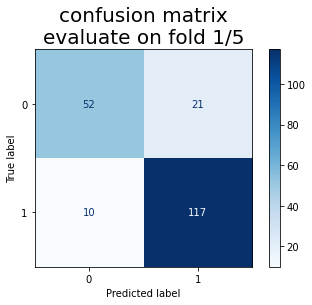

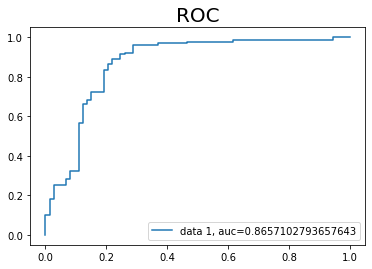

----------------------------------------------------------------------------------------------------




Feature 0, weight: 0.0394640899323258
Feature 1, weight: -0.014477489918053029
Feature 2, weight: -0.017548383195695315
Feature 3, weight: -0.008666224054254525
Feature 4, weight: -0.062332909395323655
Feature 5, weight: -0.12138137668985789
Feature 6, weight: -0.036916445200482706
Feature 7, weight: -0.04983698287054916
Feature 8, weight: -0.048042125534641315
Feature 9, weight: 0.09087072740311435
Feature 10, weight: 0.03671758270541441
Feature 11, weight: -0.4781230091114396
Feature 12, weight: -0.05754631407534163
Feature 13, weight: -0.034495191208701696
Feature 14, weight: 0.06445290821364776
Feature 15, weight: 0.0
Feature 16, weight: -0.056043032738904736
Feature 17, weight: -0.06294335072977923
Feature 18, weight: -0.02544102742607079
Feature 19, weight: -0.05039313719828426
Feature 20, weight: 0.00382739258318619
Feature 21, weight: -0.071510124705212
Feature 22, weight: -

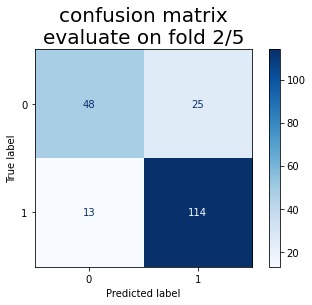

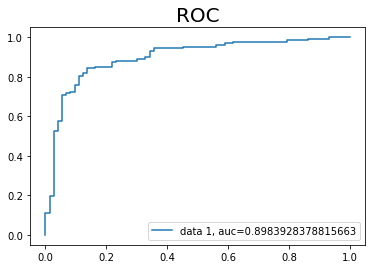

----------------------------------------------------------------------------------------------------




Feature 0, weight: 0.0403923849742407
Feature 1, weight: 0.005444526665627799
Feature 2, weight: 0.005784744718563445
Feature 3, weight: -0.007053660166448175
Feature 4, weight: -0.052924156607549774
Feature 5, weight: -0.20490771298960994
Feature 6, weight: -0.04938363239123025
Feature 7, weight: -0.04226945723419592
Feature 8, weight: -0.07974306196222646
Feature 9, weight: 0.12291529794669794
Feature 10, weight: 0.05370072522686867
Feature 11, weight: -0.8614316415525199
Feature 12, weight: -0.08758081733841061
Feature 13, weight: -0.04059526621084934
Feature 14, weight: 0.008939372703404636
Feature 15, weight: 0.0
Feature 16, weight: -0.049452400955049686
Feature 17, weight: 0.011456637671984633
Feature 18, weight: -0.025535003893581428
Feature 19, weight: -0.0827451498627714
Feature 20, weight: -0.05546912441180935
Feature 21, weight: -0.06431650096919336
Feature 22, weight: -0

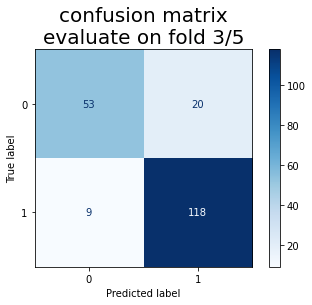

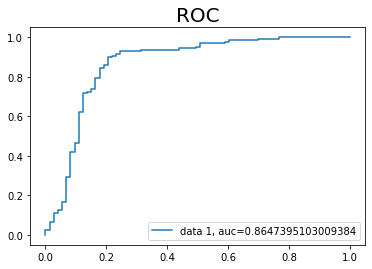

----------------------------------------------------------------------------------------------------




Feature 0, weight: 0.04170313976749231
Feature 1, weight: -0.0015534350669483626
Feature 2, weight: -0.014395582060885675
Feature 3, weight: -0.010366818171413288
Feature 4, weight: -0.05966963017063139
Feature 5, weight: -0.07849885561777536
Feature 6, weight: -0.04974539523949577
Feature 7, weight: -0.052041948625441474
Feature 8, weight: -0.0638270448250979
Feature 9, weight: 0.03834890436133658
Feature 10, weight: -0.027501314469867186
Feature 11, weight: -0.8663533161820686
Feature 12, weight: -0.08764855903132161
Feature 13, weight: -0.03557354861751978
Feature 14, weight: 0.061680964450986996
Feature 15, weight: 0.0
Feature 16, weight: -0.06309024074259788
Feature 17, weight: -0.05466778479107662
Feature 18, weight: -0.0932140146642073
Feature 19, weight: -0.04339184823212725
Feature 20, weight: -0.03970730011143913
Feature 21, weight: -0.07641902626868954
Feature 22, weight:

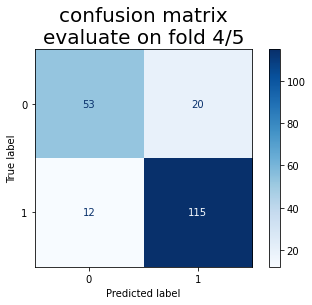

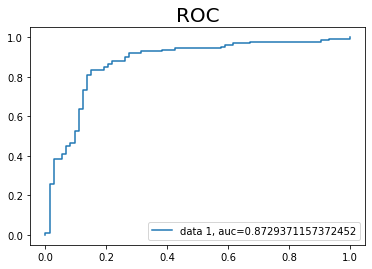

----------------------------------------------------------------------------------------------------




Feature 0, weight: 0.04063190063868694
Feature 1, weight: -0.006166454847239544
Feature 2, weight: -0.014871887347697225
Feature 3, weight: -0.024548544002119765
Feature 4, weight: -0.07832221907690791
Feature 5, weight: -0.2645107916985586
Feature 6, weight: -0.06074614203937127
Feature 7, weight: -0.04421452800030671
Feature 8, weight: -0.05789167007901572
Feature 9, weight: 0.0641232867312915
Feature 10, weight: 0.05991734192019772
Feature 11, weight: -0.798808080045803
Feature 12, weight: -0.10236393808889306
Feature 13, weight: -0.02853160036449922
Feature 14, weight: -0.007548990525979623
Feature 15, weight: 0.0
Feature 16, weight: -0.047253770140559634
Feature 17, weight: -0.014198163546889688
Feature 18, weight: -0.013033105242529703
Feature 19, weight: -0.05765412928453386
Feature 20, weight: -0.06659888840473355
Feature 21, weight: -0.0694189094938952
Feature 22, weight: -

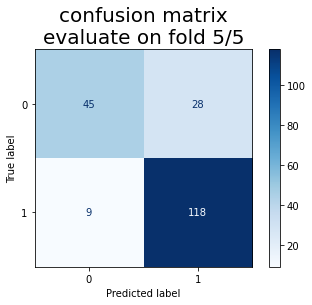

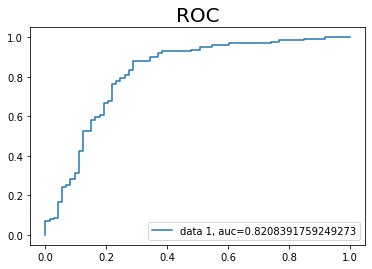

----------------------------------------------------------------------------------------------------






fold 1 score 0.845
fold 2 score 0.81
best score-> fold 3 score 0.855
fold 4 score 0.84
fold 5 score 0.815


In [26]:
stratifiedKFold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
kfold_cross_validition(stratifiedKFold)

# Linear Regression 
Assumptions of the Model

* Regression residuals must be normally distributed.
* A linear relationship is assumed between the dependent variable and the independent variables.
* The residuals are homoscedastic and approximately rectangular-shaped.
* Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
* No Autocorrelation of the residuals.

In [27]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy


In [28]:
def get_X_y_regression(split_data=False):
    X, _ = get_X_y()

    X = df.drop(['Feature 59', 'Feature 60'], axis=1) # The binary label Y (Feature 60) is erased, number 59, which holds a ‘text complexity’ value for each article, is examined.
    y = df[['Feature 59']]
    if split_data:
        return train_test_split(X, y, test_size=0.10, random_state=42)
        
    return X, y

X_train, X_test, y_train, y_test = get_X_y_regression(split_data=True)
# create a Linear Regression model object
regression_model = LinearRegression()

In [29]:
# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train);
find_model_weights(regression_model)

Feature 0, weight: 0.14253426445352868
Feature 1, weight: -0.0014693302513839046
Feature 2, weight: -0.036125102951245325
Feature 3, weight: -0.17804133431739214
Feature 4, weight: -0.08177626590383011
Feature 5, weight: -0.14079820834677742
Feature 6, weight: -0.09307530539303377
Feature 7, weight: -0.1299770949119504
Feature 8, weight: -0.12167695144978188
Feature 9, weight: 0.117419478197478
Feature 10, weight: -0.19781949312818203
Feature 11, weight: -0.5111147226814667
Feature 12, weight: -0.2274645378349532
Feature 13, weight: -0.13228854938327778
Feature 14, weight: -0.03232118471194825
Feature 15, weight: -1.6930901125533637e-15
Feature 16, weight: -0.11620044281306915
Feature 17, weight: -0.38759727326591753
Feature 18, weight: 0.016023250632842503
Feature 19, weight: -0.11451010235986243
Feature 20, weight: -0.14841071326210928
Feature 21, weight: -0.15209032835753944
Feature 22, weight: 0.04884012776642263
Feature 23, weight: 0.0008788852651341883
Feature 24, weight: -0.1792

In [30]:
def show_regression_result(y_test, y_pred, k=59, alpha=0.05):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    n = len(y_test)
    dof = n-k-1
    
    # Sum Square Error
    error = y_pred - y_test  
    sse = np.sum(np.power(error, 2))
    
    #Sum Square Residual
    y_test_mean = np.mean(y_pred)
    mean = y_pred - y_test_mean
    ssr = np.sum(np.power(mean, 2))

    #Statics
    sst = sse + ssr
    r2 = ssr/ sst
    msr = ssr/ k
    mse = sse/ dof

    #Confidents
    f_stat =  msr/ mse
    p_val = 1 - scipy.stats.f.cdf(f_stat, n, k)
    
    
    print(f'MSE: : {mse}')
    print(f'R2: : {r2}')
    print(f'The F test statistic is {f_stat} and the corresponding p-value is {p_val}.')
    less_big = ['less', 'bigger']
    reject_excapt = ['reject', 'excapt']
    print(f'Since this p-value is {less_big[bool(p_val > alpha)]} than {alpha},', end=' ')
    print(f'we would {reject_excapt[bool(p_val > alpha)]} the null hypothesis.\n')#, end='\n')     
    return r2, mse, f_stat, p_val



# a. Split the data into 90:10 of Train:Test and Construct a linear regression model on the train data. Use the constructed model to predict the label of the test data. Evaluate the model using the metrics MSE, 𝑅2,𝐹_𝑠𝑐𝑜𝑟𝑒,𝑃_𝑣𝑎𝑙 both on Train and Val.

In [31]:
regression_model.fit(X_train, y_train);
regression_predictions = regression_model.predict(X_test)
param = show_regression_result(y_test, 
                               regression_predictions, 
                               len(X_train.columns))


MSE: : 81.22144344403837
R2: : 0.5269082416651042
The F test statistic is 0.7873094649102389 and the corresponding p-value is 0.8535146553424413.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.



# b. Repeat the previous step the 100 first rows as train and next 100 rows as Test.


In [32]:
X, y = get_X_y_regression()
X_train, X_test, y_train, y_test = X[:100], X[100:200], y[:100], y[100:200]
# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train);
find_model_weights(regression_model)

Feature 0, weight: 0.41851478943230974
Feature 1, weight: -0.22287220899655158
Feature 2, weight: 0.1600519716794906
Feature 3, weight: -0.3149806943785766
Feature 4, weight: -0.2739471260341473
Feature 5, weight: -0.15460268634554641
Feature 6, weight: -0.05284982546821815
Feature 7, weight: -0.5525625222037405
Feature 8, weight: -0.31343791907058444
Feature 9, weight: 1.7745559281844172
Feature 10, weight: -0.9304264866979488
Feature 11, weight: 1.6653345369377348e-15
Feature 12, weight: -0.9050755728593165
Feature 13, weight: -0.3801672766274285
Feature 14, weight: -0.29667144873688267
Feature 15, weight: 4.111294638065033e-15
Feature 16, weight: -0.31879226227333834
Feature 17, weight: 1.2011058018555634
Feature 18, weight: -0.5237199422920256
Feature 19, weight: -0.2533603373725395
Feature 20, weight: -1.0513747218469676
Feature 21, weight: -0.3123699818885126
Feature 22, weight: 0.412460924143613
Feature 23, weight: -2.110638972340791
Feature 24, weight: 0.20557857976658545
Featu

In [33]:
pred = regression_model.predict(X_test)
param = show_regression_result( y_test, pred, 
                               len(X_train.columns))

MSE: : 176.5352328978821
R2: : 0.6194634140579434
The F test statistic is 1.1507344299964355 and the corresponding p-value is 0.2826816403217516.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.



# Regularizations
If your linear model contains many predictor variables or if these variables are correlated, the standard OLS parameter estimates have large variance, thus making the model unreliable.

To counter this, you can use regularization - a technique allowing to decrease this variance at the cost of introducing some bias. Finding a good bias-variance trade-off allows to minimize the model's total error.

There are three popular regularization techniques, each of them aiming at decreasing the size of the coefficients:
* Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).
* Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).
* Elastic Net, a convex combination of Ridge and Lasso.
![](https://miro.medium.com/max/1050/1*Jd03Hyt2bpEv1r7UijLlpg.png)

# Sources:
* [ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

* [tutorial-ridge-lasso-elastic-net](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net)

# c. Repeat the previous step with Ridge regularization of lambda = 0.01.
[Ridge Regression for Better Usage](https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db)


![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418449/eq7_ylxudw.png)

In [34]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = get_X_y_regression(split_data=True)

alpha = 0.01
ridge = Ridge(alpha=alpha).fit(X_train, y_train);
find_model_weights(ridge)


Feature 0, weight: 0.14253132364447801
Feature 1, weight: -0.0014677180646357072
Feature 2, weight: -0.03612577641372628
Feature 3, weight: -0.17803902798911084
Feature 4, weight: -0.08177599565169981
Feature 5, weight: -0.14081172331769864
Feature 6, weight: -0.09307415315377086
Feature 7, weight: -0.1299713191497144
Feature 8, weight: -0.12167474936813195
Feature 9, weight: 0.11741500397062235
Feature 10, weight: -0.19783192632085853
Feature 11, weight: -0.5109857059002365
Feature 12, weight: -0.22744576824852408
Feature 13, weight: -0.13228666032050618
Feature 14, weight: -0.03232309938891257
Feature 15, weight: 0.0
Feature 16, weight: -0.11619912651738594
Feature 17, weight: -0.38756406837831886
Feature 18, weight: 0.0160358087507212
Feature 19, weight: -0.1145121975117795
Feature 20, weight: -0.1484099279430098
Feature 21, weight: -0.1520909106546466
Feature 22, weight: 0.04882862634142274
Feature 23, weight: 0.0008904230829195383
Feature 24, weight: -0.17924024558585636
Feature 2

In [35]:
pred = ridge.predict(X_test)
param = show_regression_result(y_test, pred, 
                               len(X_train.columns))

MSE: : 81.22154424300433
R2: : 0.5268984503403831
The F test statistic is 0.787278540774988 and the corresponding p-value is 0.8535538379870438.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.



In [36]:
#Compare result of ridge to regular
for p1, p2 in zip(pred, regression_predictions):
    print(f'regular regression {p2[0]} ridge {p1[0]}', end='\n')

regular regression 17.834180476563372 ridge 17.834257093768795
regular regression 18.439071799110007 ridge 18.43903702027458
regular regression 20.916929343627757 ridge 20.91698601048308
regular regression 25.189960231456055 ridge 25.19018672954303
regular regression 22.226136132097324 ridge 22.226289084824142
regular regression 1.3005892555758614 ridge 1.300519366519925
regular regression 14.330760809674931 ridge 14.330783341977831
regular regression 17.538815229130993 ridge 17.538800078028927
regular regression 21.84197096682711 ridge 21.8422459749161
regular regression 20.861882183344942 ridge 20.861955168219307
regular regression 26.986939332259386 ridge 26.986597259469317
regular regression 18.197598878427694 ridge 18.19766778569043
regular regression 25.935944537625947 ridge 25.93573144047785
regular regression 11.873229992517512 ridge 11.873111670320672
regular regression 16.79391367403452 ridge 16.793992970324872
regular regression 22.89299707009175 ridge 22.892856775313813
reg

# d. Repeat the previous step with Lasso regularization of lambda = 0.01.

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418448/eq11_ij4mms.png)

In [37]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = get_X_y_regression(split_data=True)

alpha = 0.01
lasso = Lasso(alpha=alpha).fit(X_train, y_train);
find_model_weights(lasso)


Feature 0, weight: 0.06462510761630555
Feature 1, weight: -0.0007409484367774695
Feature 2, weight: -0.04571414533129027
Feature 3, weight: -0.08147460254703469
Feature 4, weight: -0.02390984094531222
Feature 5, weight: -0.07188680829920799
Feature 6, weight: -0.010721648037664698
Feature 7, weight: -0.05685608237349649
Feature 8, weight: -0.045684325517092464
Feature 9, weight: -2.118492998908693
Feature 10, weight: -2.4268533382623665
Feature 11, weight: 0.0
Feature 12, weight: -0.0672708425338005
Feature 13, weight: -0.050197585531190525
Feature 14, weight: 0.03823504465721131
Feature 15, weight: 0.0
Feature 16, weight: -0.04356763554441839
Feature 17, weight: -0.24688322558617445
Feature 18, weight: 0.19357835025961861
Feature 19, weight: -0.042220553784824186
Feature 20, weight: -0.08365170495463675
Feature 21, weight: -0.06869685570723348
Feature 22, weight: -2.195980329306235
Feature 23, weight: -2.1244377531981287
Feature 24, weight: -0.10055416161199594
Feature 25, weight: -0.

In [38]:
pred = lasso.predict(X_test)
param = show_regression_result(y_test, pred, 
                               len(X_train.columns))

MSE: : 25746.318176768622
R2: : 0.003288236289855704
The F test statistic is 0.0023321114279826497 and the corresponding p-value is 1.0.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.



In [39]:
#Compare result of lasso to regular
for p1, p2 in zip(pred, regression_predictions):
    print(f'regular regression {p2[0]} lasso {p1}', end='\n')

regular regression 17.834180476563372 lasso 18.083463932300116
regular regression 18.439071799110007 lasso 18.981831500111177
regular regression 20.916929343627757 lasso 21.537375837425916
regular regression 25.189960231456055 lasso 25.177437804915453
regular regression 22.226136132097324 lasso 22.707034673763168
regular regression 1.3005892555758614 lasso 1.7758206776776326
regular regression 14.330760809674931 lasso 14.369462278404807
regular regression 17.538815229130993 lasso 17.69751876327276
regular regression 21.84197096682711 lasso 22.26387809952524
regular regression 20.861882183344942 lasso 19.402774636432195
regular regression 26.986939332259386 lasso 24.877093501323916
regular regression 18.197598878427694 lasso 18.283714652790955
regular regression 25.935944537625947 lasso 22.194388905823544
regular regression 11.873229992517512 lasso 12.047153869719885
regular regression 16.79391367403452 lasso 16.85571298465508
regular regression 22.89299707009175 lasso 22.84408109109619

# e. Split the data into 80:10:10 of Train:Test:val and Construct a linear regression model on the train.

In [40]:
X, y =get_X_y_regression()
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.20, random_state=42) #80% for train data set
X_test, X_val, y_test, y_val =  train_test_split(X_split, y_split, test_size=0.50, random_state=42) #10% for test data set and 10% for validation
print(f'Train: {len(X_train)} records\ntest: {len(X_test)} records\nvalidation: {len(X_val)} records')

Train: 800 records
test: 100 records
validation: 100 records


# e. Construct 5 Models with Ridge regression 𝜆∈{10−𝑚:𝑚=1,…,5}. Evaluate each model on the Validition set and choose the best model. Evaluate the final model on the Test set.

In [51]:
def find_best_model(models):
    best_mse = -np.inf
    
    print('\n'*3, '_'*10)
    print('summary ')
    index = np.argmin([models[i]['mse'] for i in range(len(models))])

    for i in range(len(models)):
        if i == index:
            model = models[i]['model']
            print('best score', end='-> ')
        t = models[i]['mse']
        print(f'model {i+1} mse {t}' )
       
    return model

    
def lets_have_some_validition(model, alphas):
    models={}
    for i, alpha in enumerate(alphas):
        print(f'Alpha: {alpha}')
        m = model(alpha=alpha).fit(X_train, y_train)
        pred = m.predict(X_val)
        _, mse, _, _ = show_regression_result(y_val, pred, 
                                              len(X_train.columns)) #evaluate on validition dataset
        models[i] = {
            'mse': mse,
            'model': m
        }
    return find_best_model(models)
    

# Evaluate each model on the Validition set

In [52]:
alphas = [pow(10, -i) for i in [1,2,3,4,5]]

best_ridge = lets_have_some_validition(Ridge, alphas)

Alpha: 0.1
MSE: : 82.88951228592161
R2: : 0.5496593330888258
The F test statistic is 0.8627963578073192 and the corresponding p-value is 0.7436945960775587.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.

Alpha: 0.01
MSE: : 82.9073579317355
R2: : 0.5496457557866435
The F test statistic is 0.8627490346273119 and the corresponding p-value is 0.7437708985573155.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.

Alpha: 0.001
MSE: : 82.90922983736282
R2: : 0.5496441749542056
The F test statistic is 0.8627435248803053 and the corresponding p-value is 0.7437797818302458.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.

Alpha: 0.0001
MSE: : 82.90941799024633
R2: : 0.5496440144045917
The F test statistic is 0.8627429653116166 and the corresponding p-value is 0.7437806840079009.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.

Alpha: 1e-05
MSE: : 82.90943681525377
R2: : 0.549643998

# Evaluate the final model on the Test set

In [53]:
pred = best_ridge.predict(X_test)
param = show_regression_result(y_test, pred, 
                               len(X_train.columns))

MSE: : 55.53037063000094
R2: : 0.6272558549881265
The F test statistic is 1.1895693248937773 and the corresponding p-value is 0.23746454602911837.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.



# f. Construct 5 Models with Lasso regression 𝜆∈{10−𝑚:𝑚=1,…,5}. Evaluate each model on the Validition set and choose the best model. Evaluate the final model on the Test set.

# Evaluate each model on the Validition set

In [54]:
best_lasso = lets_have_some_validition(Lasso, alphas)

Alpha: 0.1
MSE: : 25297.24192300971
R2: : 0.003483758038700079
The F test statistic is 0.0024712658368231293 and the corresponding p-value is 1.0.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.

Alpha: 0.01
MSE: : 25923.635943593115
R2: : 0.00364431942256231
The F test statistic is 0.00258557951082046 and the corresponding p-value is 1.0.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.

Alpha: 0.001
MSE: : 26046.539679878362
R2: : 0.0036752604738225603
The F test statistic is 0.002607612611194152 and the corresponding p-value is 1.0.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.

Alpha: 0.0001
MSE: : 26061.440443233536
R2: : 0.0036789067966582927
The F test statistic is 0.002610209245205127 and the corresponding p-value is 1.0.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.

Alpha: 1e-05
MSE: : 26063.192433450957
R2: : 0.003679285632533461
The F test statistic is 0.00

# Evaluate the final model on the Test set

In [45]:
pred = best_lasso.predict(X_test)
param = show_regression_result(y_test, pred,
                              len(X_train.columns))

MSE: : 19281.3789010371
R2: : 0.0040952453721771155
The F test statistic is 0.002906818968986736 and the corresponding p-value is 1.0.
Since this p-value is bigger than 0.05, we would excapt the null hypothesis.

